In [1]:
# import sys
# sys.path.append('')

In [2]:
import os
import pefile
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import glob
import magic
import hashlib
import sys
import struct
import peutils
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import pefileHuman as peh


In [3]:
def sha256_checksum(filename, block_size=65536):
    sha256 = hashlib.sha256()
    with open(filename, 'rb') as f:
        for block in iter(lambda: f.read(block_size), b''):
            sha256.update(block)
    return sha256.hexdigest()



Now we move on to write a small method that constructs a dictionnary for each PE File thus each sample will be represented as a python dictionnary where keys are the features and values are the value of each parsed field .

In [4]:
def pe2vec(directory):
    """
    dirty function (handling all exceptions) for each sample
    it construct a dictionary of dictionaries in the format:
    sample x : pe informations
    """
    dataset = {}
    #directory = "./data/"
    print("")
    print("[*] Extracting the PE file data: ")
    print("")
    for subdir, dirs, files in os.walk(directory):
        for f in files:
            file_path = os.path.join(subdir, f)
            
            #print(magic.from_file(file_path))
            if re.match('^PE.*', magic.from_file(file_path)):
                try:
                    #print("[+] "+file_path)
                    pe = peh.PEFile(file_path)
                    dataset[str(f)] = pe.Construct()
                except Exception as e:
                    raise
            else:
                #print()
                #print("[-] File not PE: "+file_path+" \n=>\t "+magic.from_file(file_path))
                #print()
                #print("Removing file.")
                os.remove(file_path)
    return dataset
    
    

### Testing the pe2vec() method and PEFile class

Print out the dataset for the Malware and Clean Samples


In [5]:
# for subdir, dirs, files in os.walk("./data/malware/"):
#         for f in files:
#             #print(f)
#             os.rename("./data/malware/"+f, "./data/malware/"+sha256_checksum("./data/malware/"+f))
            
# print("Done Renaming files to sha256")

In [6]:
# create a dataset dictionary from the collected PE file information
# we might consider adding an MD5 hash value and aappend it to a new column
# an asscoiated MD5 value could be used to lookup the VirusToltal score to confirm it is Malware if we did not get the sample from a good source
ds_malware = {}
ds_malware = pe2vec("./data/malware/")
print("")
print("[*] Malware PE information:")
print("")
#pp.pprint(ds_malware)

print("")
print("[*] Completed Malware PE information extraction:")
print("")


[*] Extracting the PE file data: 


[*] Malware PE information:


[*] Completed Malware PE information extraction:



In [7]:
# for subdir, dirs, files in os.walk("./data/clean/"):
#         for f in files:
#             #print(f)
#             os.rename("./data/clean/"+f, "./data/clean/"+sha256_checksum("./data/clean/"+f))

# print("Done Renaming files to sha256")

In [8]:
ds_clean = {}
ds_clean = pe2vec("./data/clean/")
print("")
print("[*] Clean PE information:")
print("")
#pp.pprint(ds_clean)

print("")
print("[*] Completed Clean PE information extraction:")
print("")




[*] Extracting the PE file data: 


[*] Clean PE information:


[*] Completed Clean PE information extraction:



Loop trough all samples in a folder and process each one of them then dump all those dictionaries into a csv file that we will use .

In [9]:
# now that we have a dictionary let's put it in a clean csv file
def vec2csv(dataset, output_file):
    df = pd.DataFrame(dataset)
    test_data = df.transpose()  # transpose to have the features as columns and samples as rows
# utf-8 is prefered 
#output_file = './output/dataset.csv'
    test_data.to_csv(output_file,sep=',', encoding='utf-8')
    print("")
    print("[+] Saving file to: " + output_file)
    print("")
        
        

### Export the dataset as a csv file

In [10]:
datasetOutput_malware = "./dataset/dataset_malware.csv"
vec2csv(ds_malware, datasetOutput_malware)

datasetOutput_clean = "./dataset/dataset_clean.csv"
vec2csv(ds_clean, datasetOutput_clean)




[+] Saving file to: ./dataset/dataset_malware.csv


[+] Saving file to: ./dataset/dataset_clean.csv



Use Magic %matplotlib to display graphics inline instead of in a popup window.



In [11]:
%matplotlib inline



#### Malware Dataframe

In [12]:
# get the dataframe
df_malware = pd.read_csv("./dataset/dataset_malware.csv")
df_malware.shape
df_malware.head(5)



,Unnamed: 0,filename,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,...,IATSize,DelayImportRVA,DelayImportSize,COMDescriptorRVA,COMDescriptorSize,ImportedDLL,NumberOfImportDLL,SectionNames,NumberOfImportFunctions,ImportedFunctions
0,000077419ead44800537b34f5c2137e572c472698a13c3...,./data/malware/000077419ead44800537b34f5c2137e...,23117,144,3,0,4,0,65535,0,...,64.0,0.0,0.0,0.0,0.0,"{'KERNEL32.dll': 'GetProcAddress', 'USER32.dll...",4,"{'.text\x00\x00\x00': 4096, '.rdata\x00\x00': ...",12,"['GetLastError', 'ExitProcess', 'GetSystemDire..."
1,0004b6ce277aa1a259359ee0400bf7cb3f2aafdeeae291...,./data/malware/0004b6ce277aa1a259359ee0400bf7c...,23117,144,3,0,4,0,65535,0,...,216.0,0.0,0.0,0.0,0.0,"{'KERNEL32.dll': 'GetStringTypeW', 'USER32.dll...",5,"{'.text\x00\x00\x00': 12288, '.rdata\x00\x00':...",49,"['GetTickCount', 'GetProcAddress', 'VirtualAll..."
2,0008d6d1dcbe359dab5780be87005be659ea93eae5878a...,./data/malware/0008d6d1dcbe359dab5780be87005be...,23117,80,2,0,4,15,65535,0,...,176.0,0.0,0.0,0.0,0.0,"{'KERNEL32.dll': 'LocalFree', 'USER32.dll': 'E...",4,"{'.text\x00\x00\x00': 5632, '.rdata\x00\x00': ...",39,"['VirtualAlloc', 'GetDiskFreeSpaceW', 'CloseHa..."
3,000d1bab5fa789f2d3b120bccb5452c7c3fe52073bd88d...,./data/malware/000d1bab5fa789f2d3b120bccb5452c...,23117,144,3,0,4,0,65535,0,...,484.0,0.0,0.0,0.0,0.0,"{'WS2_32.dll': 'inet_addr', 'RPCRT4.dll': 'Uui...",7,"{'.text\x00\x00\x00': 143360, '.rdata\x00\x00'...",114,"['htonl', 'ntohl', 'inet_addr', 'UuidFromStrin..."
4,000d6230792fefff601c0e5e87369196fdd5cfb484fdd8...,./data/malware/000d6230792fefff601c0e5e8736919...,23117,80,3,0,0,15,65535,0,...,0.0,0.0,0.0,0.0,0.0,"{'KERNEL32.dll': 'GetCurrentThreadId', 'USER32...",4,"{'.text\x00\x00\x00': 5632, '.rdata\x00\x00': ...",39,"['InitializeCriticalSection', 'ReleaseMutex', ..."


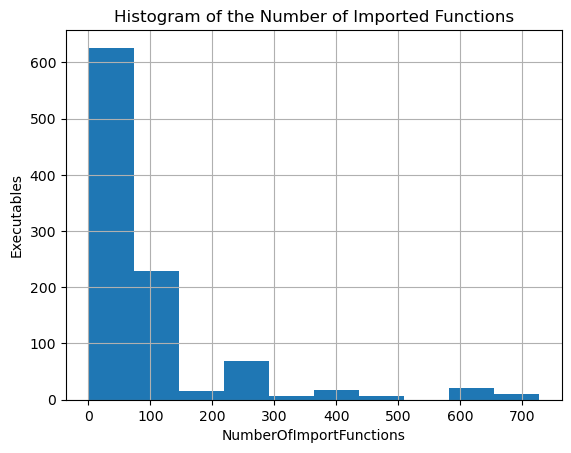

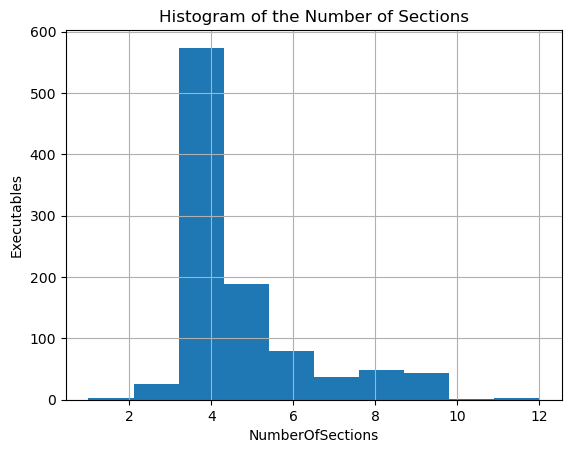

In [13]:
# histograms
df_malware['NumberOfImportFunctions'].hist()
plt.title(r'Histogram of the Number of Imported Functions')
plt.xlabel('NumberOfImportFunctions')
plt.ylabel('Executables')
plt.show()
df_malware['NumberOfSections'].hist()
plt.title(r'Histogram of the Number of Sections')
plt.xlabel('NumberOfSections')
plt.ylabel('Executables')
plt.show()



#### Clean Dataframe

In [14]:
df_clean = pd.read_csv("./dataset/dataset_clean.csv")
df_clean.shape
df_clean.head(5)



,Unnamed: 0,filename,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,...,IATSize,DelayImportRVA,DelayImportSize,COMDescriptorRVA,COMDescriptorSize,ImportedDLL,NumberOfImportDLL,SectionNames,NumberOfImportFunctions,ImportedFunctions
0,002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...,./data/clean/002ce0d28ec990aadbbc89df457189de3...,23117,144,3,0,4,0,65535,0,...,1960,0,0,0,0,"{'ADVAPI32.dll': 'CreateServiceW', 'KERNEL32.d...",10,"{'.text\x00\x00\x00': 260096, '.rdata\x00\x00'...",235,"['GetAclInformation', 'GetAce', 'GetSecurityDe..."
1,003851675800dc05cdac1baa84cab8f68534b244906d97...,./data/clean/003851675800dc05cdac1baa84cab8f68...,23117,144,3,0,4,0,65535,0,...,1208,0,0,0,0,{'libgimpui-2.0-0.dll': 'gimp_window_set_trans...,12,"{'.text\x00\x00\x00': 12288, '.data\x00\x00\x0...",139,"['gimp_ui_init', 'gimp_window_set_transient', ..."
2,00eea85752664955047caad7d6280bc7bf1ab91c61eb9a...,./data/clean/00eea85752664955047caad7d6280bc7b...,23117,144,3,0,4,0,65535,0,...,760,0,0,0,0,"{'libgcc_s_seh-1.dll': '_Unwind_Resume', 'libs...",4,"{'.text\x00\x00\x00': 19456, '.data\x00\x00\x0...",91,"['_Unwind_Resume', '_ZNKSs5rfindEPKcy', '_ZNKS..."
3,0111bddac92a792c7b2ee3ab77642c33df0e01afe737b0...,./data/clean/0111bddac92a792c7b2ee3ab77642c33d...,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,"{'msys-1.0.dll': 'vsnprintf', 'KERNEL32.dll': ...",2,"{'.text\x00\x00\x00': 48640, '.data\x00\x00\x0...",67,"['__errno', '__main', '_ctype_', 'abort', 'ato..."
4,016584e586de67b725ac1e3974fcca320bf81c8c489ebb...,./data/clean/016584e586de67b725ac1e3974fcca320...,23117,80,2,0,4,15,65535,0,...,0,0,0,0,0,"{'ADVAPI32.dll': 'RegQueryValueA', 'KERNEL32.d...",3,"{'.text\x00\x00\x00': 45056, '.data\x00\x00\x0...",82,"['RegQueryValueA', 'CloseHandle', 'CreateFileA..."


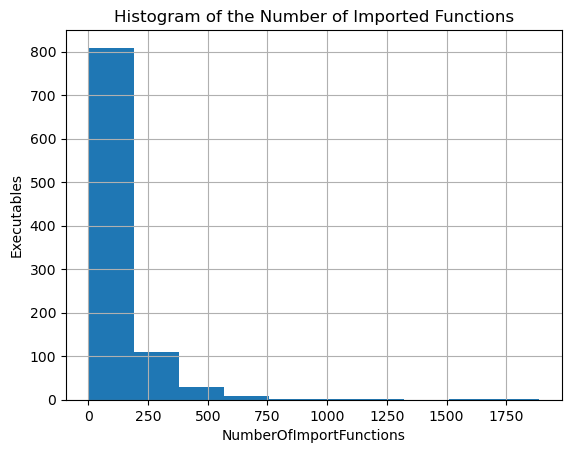

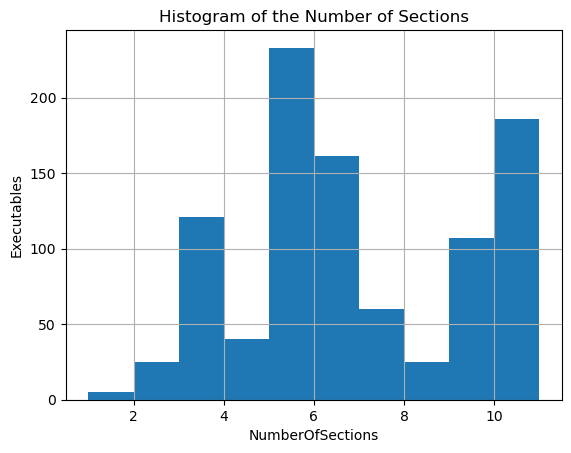

In [17]:
# histograms
df_clean['NumberOfImportFunctions'].hist()
plt.title(r'Histogram of the Number of Imported Functions')
plt.xlabel('NumberOfImportFunctions')
plt.ylabel('Executables')
plt.show()
df_clean['NumberOfSections'].hist()
plt.title(r'Histogram of the Number of Sections')
plt.xlabel('NumberOfSections')
plt.ylabel('Executables')
plt.show()



## Check the correlation
Helper function that displays correlation by color. Red is most correlated, Blue least.

In [18]:
def plot_corr(df, size=15):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

In [19]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [20]:
try:
    del df_clean['Unnamed: 0']
    del df_clean['filename']
    del df_clean['SectionNames']
    del df_clean['ImportedFunctions']
    del df_clean['ImportedDLL']
    del df_clean['e_res']
    del df_clean['e_res2']
    del df_clean['TimeDateStamp']
    print("[*] Columns removed successfully")
except KeyError as e:
    print(f"[!] Column {e} does not exist in DataFrame")

[*] Columns removed successfully


In [21]:
df_clean.corr()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,BoundImportRVA,BoundImportSize,IATRVA,IATSize,DelayImportRVA,DelayImportSize,COMDescriptorRVA,COMDescriptorSize,NumberOfImportDLL,NumberOfImportFunctions
e_magic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_cblp,NaN,1.000000,1.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.104831,0.032148,0.016116,-0.023543,0.028483,0.060548,-0.080083,-0.096145
e_cp,NaN,1.000000,1.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.104831,0.032148,0.016116,-0.023543,0.028483,0.060548,-0.080083,-0.096145
e_crlc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_cparhdr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DelayImportSize,NaN,-0.023543,-0.023543,NaN,NaN,0.023543,NaN,NaN,NaN,NaN,...,NaN,NaN,0.082552,0.064369,0.593542,1.000000,-0.049560,-0.105355,0.259876,0.104292
COMDescriptorRVA,NaN,0.028483,0.028483,NaN,NaN,-0.028483,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.038341,-0.086478,-0.030385,-0.049560,1.000000,0.470411,-0.082949,-0.047243
COMDescriptorSize,NaN,0.060548,0.060548,NaN,NaN,-0.060548,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.122670,-0.306352,-0.064592,-0.105355,0.470411,1.000000,-0.403761,-0.326888
NumberOfImportDLL,NaN,-0.080083,-0.080083,NaN,NaN,0.080083,NaN,NaN,NaN,NaN,...,NaN,NaN,0.185783,0.415466,0.138532,0.259876,-0.082949,-0.403761,1.000000,0.423772


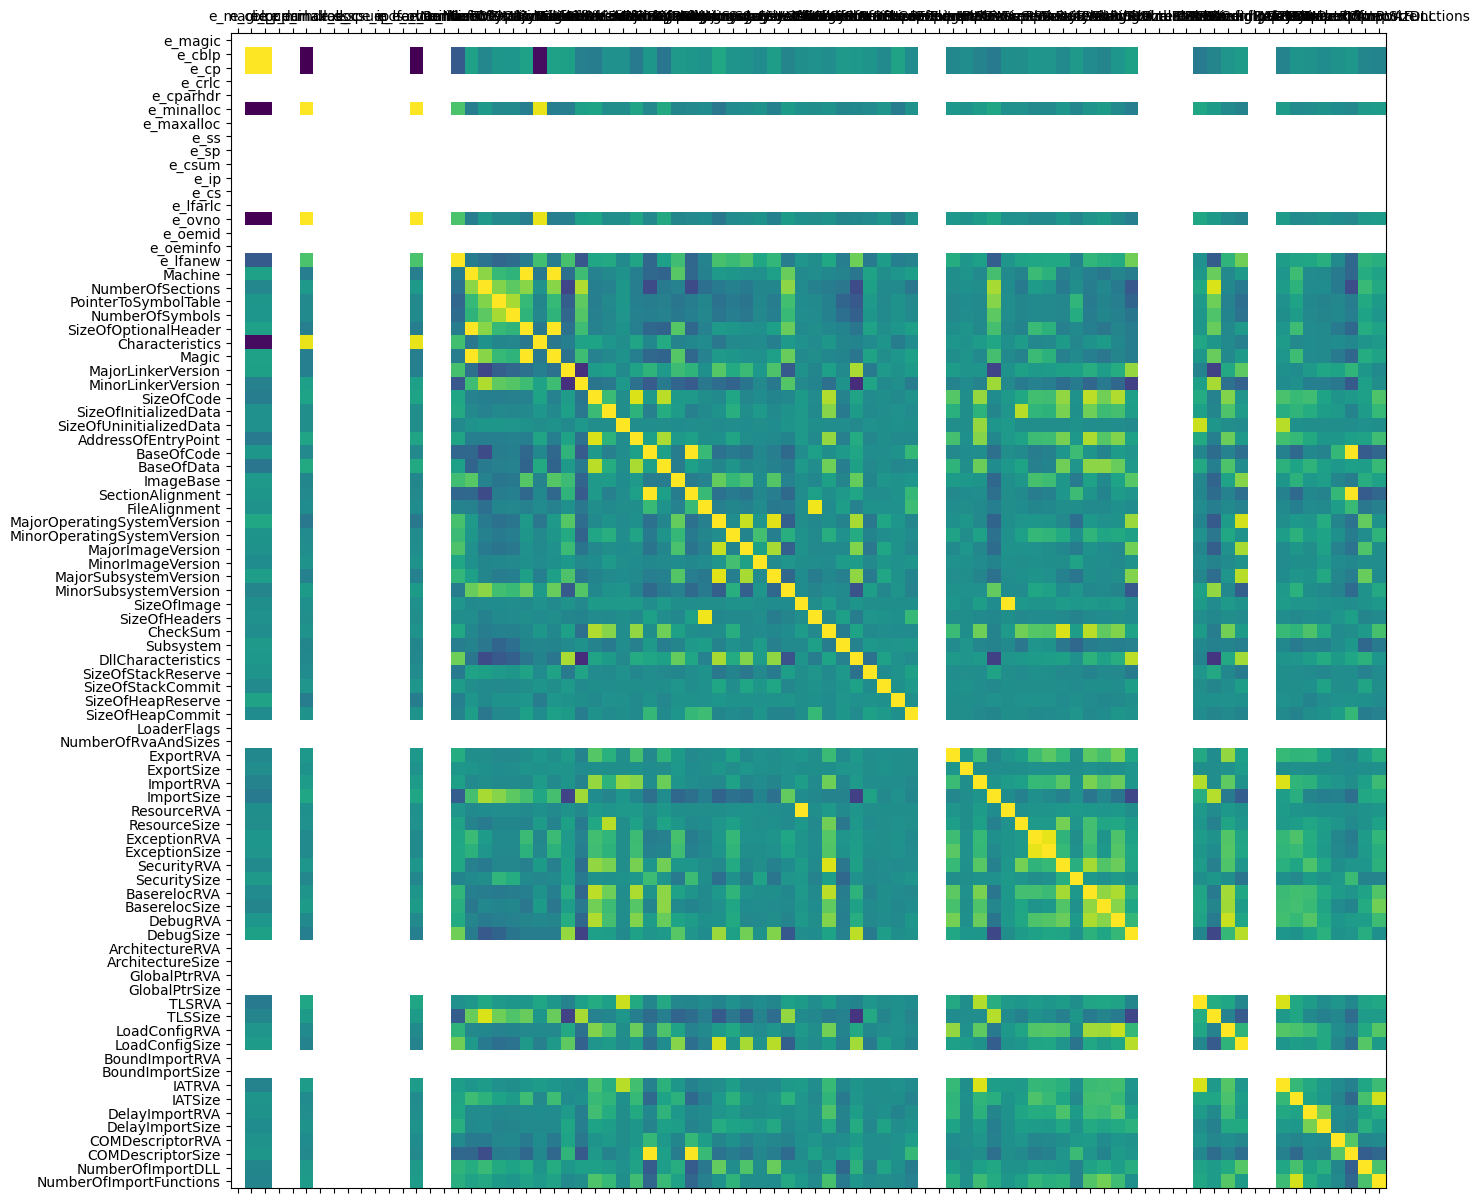

In [22]:
plot_corr(df_clean)

In [23]:
#correlation(df_clean, .99)

In [24]:
#plot_corr(df_clean)

In [25]:
try:
    del df_malware['Unnamed: 0']
    del df_malware['filename']
    del df_malware['SectionNames']
    del df_malware['ImportedFunctions']
    del df_malware['ImportedDLL']
    del df_malware['e_res']
    del df_malware['e_res2']
    del df_malware['TimeDateStamp']
    print("[*] Columns removed successfully")
except KeyError as e:
    print(f"[!] Column {e} does not exist in DataFrame")

[*] Columns removed successfully


In [26]:
df_malware.corr()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,BoundImportRVA,BoundImportSize,IATRVA,IATSize,DelayImportRVA,DelayImportSize,COMDescriptorRVA,COMDescriptorSize,NumberOfImportDLL,NumberOfImportFunctions
e_magic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_cblp,NaN,1.000000,0.787102,NaN,0.771058,-0.993243,NaN,NaN,0.979557,NaN,...,0.007375,0.007375,0.059711,0.128954,-0.513154,-0.000192,0.007375,0.007375,0.013381,0.104535
e_cp,NaN,0.787102,1.000000,NaN,0.412029,-0.816344,NaN,NaN,0.721425,NaN,...,0.006041,0.006041,0.009210,0.102876,-0.588483,-0.000961,0.006041,0.006041,0.002044,0.079532
e_crlc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_cparhdr,NaN,0.771058,0.412029,NaN,1.000000,-0.762633,NaN,NaN,0.775209,NaN,...,0.005665,0.005665,-0.016263,0.092443,-0.559163,-0.003292,0.005665,0.005665,0.031985,0.084810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DelayImportSize,NaN,-0.000192,-0.000961,NaN,-0.003292,0.000067,NaN,NaN,-0.000495,NaN,...,-0.001058,-0.001058,-0.025541,-0.024856,0.232010,1.000000,-0.001058,-0.001058,0.223892,-0.004791
COMDescriptorRVA,NaN,0.007375,0.006041,NaN,0.005665,-0.007417,NaN,NaN,0.007112,NaN,...,-0.001002,-0.001002,-0.024170,-0.023646,-0.004010,-0.001058,1.000000,1.000000,-0.054994,-0.024596
COMDescriptorSize,NaN,0.007375,0.006041,NaN,0.005665,-0.007417,NaN,NaN,0.007112,NaN,...,-0.001002,-0.001002,-0.024170,-0.023646,-0.004010,-0.001058,1.000000,1.000000,-0.054994,-0.024596
NumberOfImportDLL,NaN,0.013381,0.002044,NaN,0.031985,-0.013903,NaN,NaN,0.040158,NaN,...,0.059976,0.059976,0.113776,0.235174,0.029345,0.223892,-0.054994,-0.054994,1.000000,0.380246


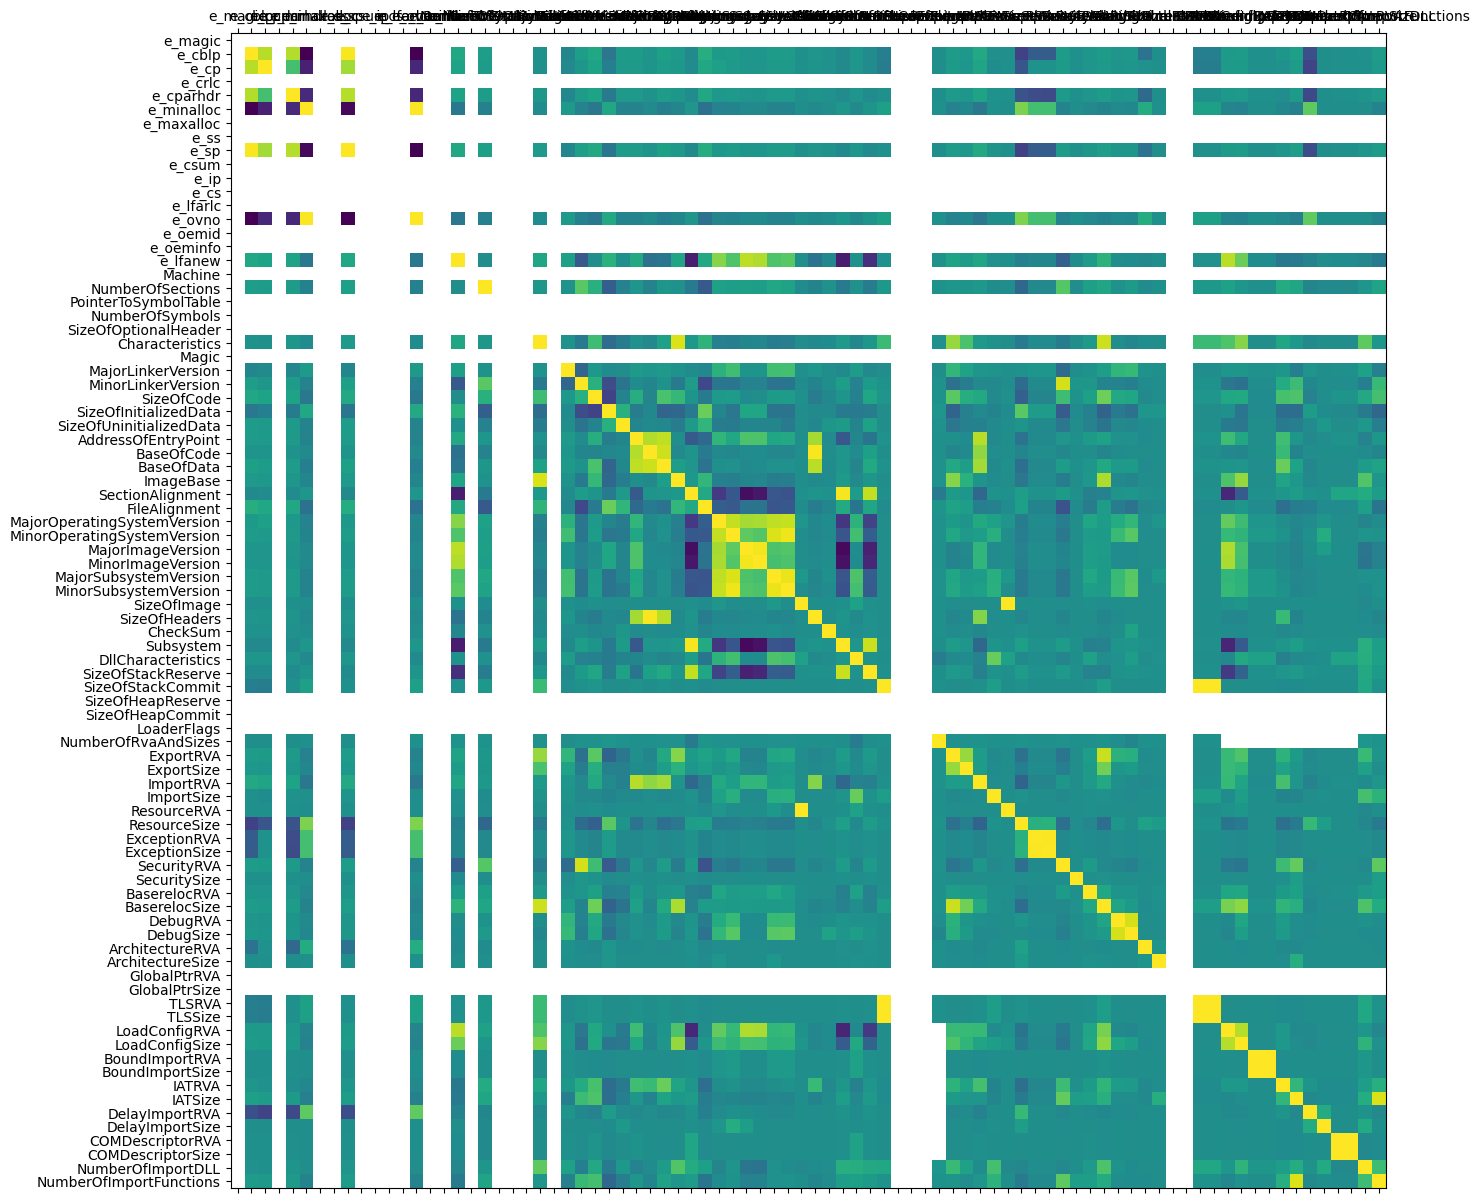

In [27]:
plot_corr(df_malware)

In [28]:
#correlation(df_malware, .99)

In [29]:
#plot_corr(df_malware)

In [30]:
def appendCSV(inputfile, outputfile, newheader, newdata):
    """   
    Function to add a new columns, new header, and new data to a csv file.  
    This new "Malware" column will be a boolean value of 0 = "Clean" and 1 = "Malware" value.
    
    Input:
        inputfile: "./output/dataset_malware.csv"
        outputfile: "./dataset/dataset_malware.csv"
        newheader: "Malware"
        newdata: 1
        
    Example:
        appendCSV("./output/dataset_malware.csv", "./dataset/dataset_malware.csv", "Malware", 1)
    """
    csv.field_size_limit(100000000)
    reader = csv.reader(open(inputfile, "r"))
    writer = csv.writer(open(outputfile, "w"))
    headers = next(reader)
    headers.append(newheader)
    writer.writerow(headers)
    for row in reader:
        row.append(newdata)
        writer.writerow(row)
        
        

Append the CSV files to mark the datasets as Malware or Clean

In [31]:
appendCSV("./dataset/dataset_malware.csv", "./dataset/dataset_malware2.csv", "Malware", 1)
appendCSV("./dataset/dataset_clean.csv", "./dataset/dataset_clean2.csv", "Malware", 0)

In [32]:
os.remove('./dataset/dataset_malware.csv')
os.remove('./dataset/dataset_clean.csv')

Merge the Clean dataset and Malware dataset into one CSV file

We should also look into removing duplictaes and randomizing the order of samples in the dataset.

In [33]:
interesting_files = glob.glob("./dataset/dataset_*.csv") 

header_saved = False
with open("./dataset/dataset_merged.csv","w") as fout:
    for filename in interesting_files:
        with open(filename) as fin:
            header = next(fin)
            if not header_saved:
                fout.write(header)
                header_saved = True
            for line in fin:
                fout.write(line)



### Loading and Reviewing the Merged Data

In [34]:
df_merged = pd.read_csv("./dataset/dataset_merged.csv")


We dont need the Columns "ImportedSymbols" and "filename" for now so we will just drop them from the dataframe.

In [35]:
df_merged.head(5)



,Unnamed: 0,filename,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,...,DelayImportRVA,DelayImportSize,COMDescriptorRVA,COMDescriptorSize,ImportedDLL,NumberOfImportDLL,SectionNames,NumberOfImportFunctions,ImportedFunctions,Malware
0,002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...,./data/clean/002ce0d28ec990aadbbc89df457189de3...,23117,144,3,0,4,0,65535,0,...,0.0,0.0,0.0,0.0,"{'ADVAPI32.dll': 'CreateServiceW', 'KERNEL32.d...",10,"{'.text\x00\x00\x00': 260096, '.rdata\x00\x00'...",235,"['GetAclInformation', 'GetAce', 'GetSecurityDe...",0
1,003851675800dc05cdac1baa84cab8f68534b244906d97...,./data/clean/003851675800dc05cdac1baa84cab8f68...,23117,144,3,0,4,0,65535,0,...,0.0,0.0,0.0,0.0,{'libgimpui-2.0-0.dll': 'gimp_window_set_trans...,12,"{'.text\x00\x00\x00': 12288, '.data\x00\x00\x0...",139,"['gimp_ui_init', 'gimp_window_set_transient', ...",0
2,00eea85752664955047caad7d6280bc7bf1ab91c61eb9a...,./data/clean/00eea85752664955047caad7d6280bc7b...,23117,144,3,0,4,0,65535,0,...,0.0,0.0,0.0,0.0,"{'libgcc_s_seh-1.dll': '_Unwind_Resume', 'libs...",4,"{'.text\x00\x00\x00': 19456, '.data\x00\x00\x0...",91,"['_Unwind_Resume', '_ZNKSs5rfindEPKcy', '_ZNKS...",0
3,0111bddac92a792c7b2ee3ab77642c33df0e01afe737b0...,./data/clean/0111bddac92a792c7b2ee3ab77642c33d...,23117,144,3,0,4,0,65535,0,...,0.0,0.0,0.0,0.0,"{'msys-1.0.dll': 'vsnprintf', 'KERNEL32.dll': ...",2,"{'.text\x00\x00\x00': 48640, '.data\x00\x00\x0...",67,"['__errno', '__main', '_ctype_', 'abort', 'ato...",0
4,016584e586de67b725ac1e3974fcca320bf81c8c489ebb...,./data/clean/016584e586de67b725ac1e3974fcca320...,23117,80,2,0,4,15,65535,0,...,0.0,0.0,0.0,0.0,"{'ADVAPI32.dll': 'RegQueryValueA', 'KERNEL32.d...",3,"{'.text\x00\x00\x00': 45056, '.data\x00\x00\x0...",82,"['RegQueryValueA', 'CloseHandle', 'CreateFileA...",0


#### Check For Null Values

In [36]:
df_merged.isnull().values.any()



True

### Check class distribution 

Rare events are hard to predict

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

In [37]:
num_obs = len(df_merged)
num_true = len(df_merged.loc[df_merged['Malware'] == 1])
num_false = len(df_merged.loc[df_merged['Malware'] == 0])

print("")
print("[*] Number of Malware files:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("[*] Number of Clean files: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))
print("")



[*] Number of Malware files:  1000 (50.94%)
[*] Number of Clean files: 963 (49.06%)

